In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df_dsa = pd.read_csv('dataset.csv')

In [4]:
df_dsa.shape

(500, 2)

In [5]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [6]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [7]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [9]:
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [10]:
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [11]:
df_dsa['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

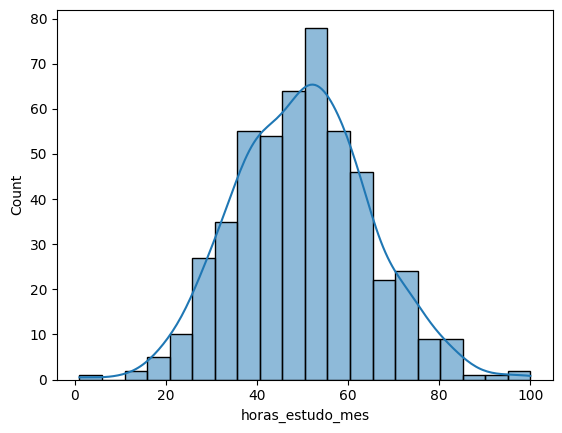

In [12]:
sns.histplot(data = df_dsa, x = 'horas_estudo_mes', kde = True)

In [13]:
x = np.array(df_dsa['horas_estudo_mes'])

In [14]:
type(x)

numpy.ndarray

In [15]:
#Ajusta o shape de x
x = x.reshape(-1, 1)

In [16]:
#Prepara a variavel alvo
y = df_dsa['salario']

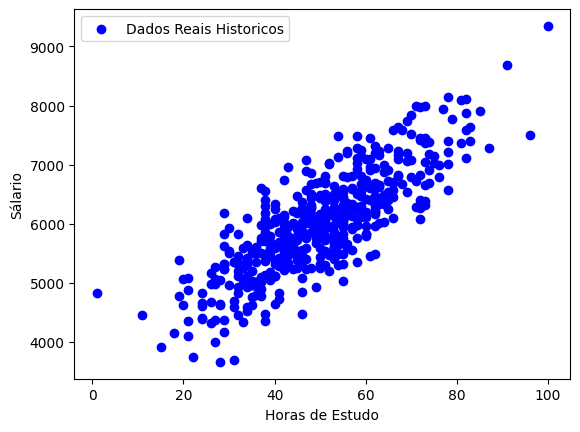

In [17]:
#Grafico de dispersão entre x e y
plt.scatter(x, y, color = 'blue', label = 'Dados Reais Historicos')
plt.xlabel('Horas de Estudo')
plt.ylabel('Sálario')
plt.legend()
plt.show()

In [18]:
#Dividir dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [19]:
x_treino.shape

(400, 1)

In [20]:
x_teste.shape

(100, 1)

In [21]:
y_treino.shape

(400,)

In [22]:
y_teste.shape

(100,)

In [23]:
#cria o modelo de regressão simples
modelo = LinearRegression()

In [24]:
#treina o modelo 
modelo.fit(x_treino, y_treino)

LinearRegression()

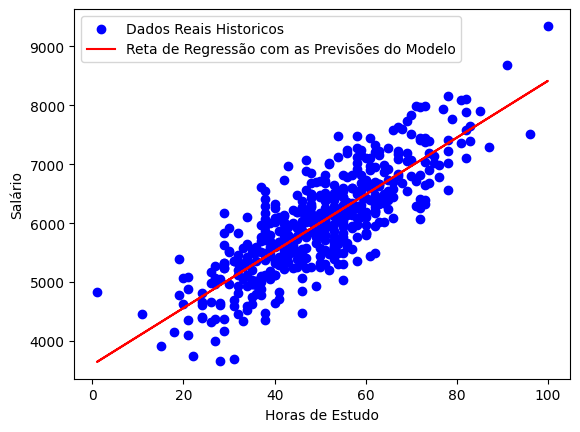

In [25]:
plt.scatter(x, y, color = 'blue', label = 'Dados Reais Historicos')
plt.plot(x, modelo.predict(x), color = 'red', label = 'Reta de Regressão com as Previsões do Modelo')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [26]:
#Avalia o modelo nos dados de teste
score = modelo.score(x_teste, y_teste)
print(f'Coeficiente R^2: {score:.2f}')

Coeficiente R^2: 0.59


In [27]:
#intercepto - parametro w0
modelo.intercept_

np.float64(3596.783724372753)

In [29]:
#slope - paramtro w1
modelo.coef_

array([48.18185277])

Deploy do Modelo

In [30]:
#Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

#Faz previsões com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estuda cerca de', horas_estudo_novo, 'horas por mês seu salario pode ser igual a', salario_previsto)

Se você estuda cerca de [[48]] horas por mês seu salario pode ser igual a [5909.5126574]


In [31]:
#Mesmo resultado alterior usando parâmetros (coeficiente) aprendidos pelo modelo
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
salario

array([[5909.5126574]])

In [33]:
#Define um novo valor para horas estudo
horas_estudo_novo = np.array([[65]])

#Faz previsão com o modelo treinado 
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês seu salario pode ser igual a', salario_previsto)

Se você estudar cerca de [[65]] horas por mês seu salario pode ser igual a [6728.60415452]


In [34]:
horas_estudo_novo = np.array([[73]])

salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês seu salario pode ser igual a', salario_previsto)

Se você estudar cerca de [[73]] horas por mês seu salario pode ser igual a [7114.05897669]
